<a href="https://colab.research.google.com/github/khushisaini05/Machine-Learning/blob/Diabetes-Dataset/Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


# load method for splitting data
from sklearn.model_selection import train_test_split
# load models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Confusion matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [4]:
# Download the dataset file and upload it to the file storage from the system
# Importing dataset
diabetes=pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Info of the dataset
diabetes.info()
# shows it has 768 rows and 9 columns...none of which have NULL value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
features=list(diabetes.columns)[:-1]
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [7]:
#data head
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Count of null values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Shape of dataset
diabetes.shape

(768, 9)

In [10]:
# Describe dataset(data stats)
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Correlation within the dataset
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
# make split (dataframe and series)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(diabetes[features],diabetes['Outcome'],random_state=42,test_size=0.33,train_size=0.33)

Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((253, 8), (254, 8), (253,), (254,))

In [13]:
#make model
regrss=LogisticRegression(max_iter=500)
# make model train (fit) (calculated m and c (feature extraction))
regrss.fit(Xtrain,Ytrain)

# make evaluate model
print('Score (training): ',regrss.score(Xtrain,Ytrain))
print('Score (testing): ',regrss.score(Xtest,Ytest))

Score (training):  0.7865612648221344
Score (testing):  0.7244094488188977


In [14]:
#make model
svm=SVC(kernel='linear')
# make model train (fit) (calculated m and c (feature extraction))
svm.fit(Xtrain,Ytrain)

# make evaluate model
print('Score (training): ',svm.score(Xtrain,Ytrain))
print('Score (testing): ',svm.score(Xtest,Ytest))

Score (training):  0.7786561264822134
Score (testing):  0.7322834645669292


In [15]:
#make model
tree=DecisionTreeClassifier()
# make model train (fit) (calculated m and c (feature extraction))
tree.fit(Xtrain,Ytrain)

# make evaluate model
print('Score (training): ',tree.score(Xtrain,Ytrain))
print('Score (testing): ',tree.score(Xtest,Ytest))

Score (training):  1.0
Score (testing):  0.6811023622047244


In [16]:
diabetes['Prediction1']=regrss.predict(diabetes[features])
diabetes['Prediction2']=svm.predict(diabetes[features])

In [17]:
# data tail
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Prediction1,Prediction2
763,10,101,76,48,180,32.9,0.171,63,0,1,1
764,2,122,70,27,0,36.8,0.340,27,0,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0,0
767,1,93,70,31,0,30.4,0.315,23,0,0,0


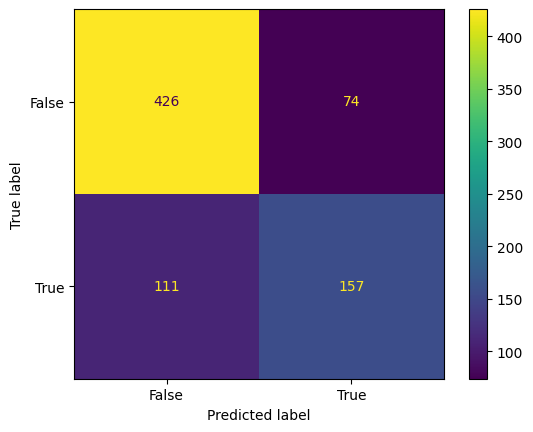

In [20]:
confusion_matrix = confusion_matrix(diabetes['Outcome'],diabetes['Prediction1'])
CM = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
CM.plot()
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

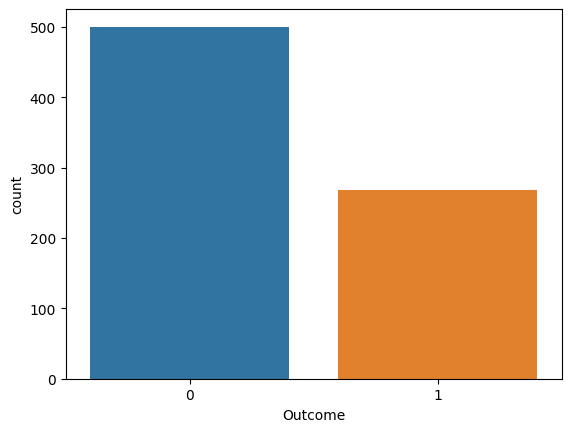

In [21]:
sns.countplot(x = 'Outcome',data = diabetes)

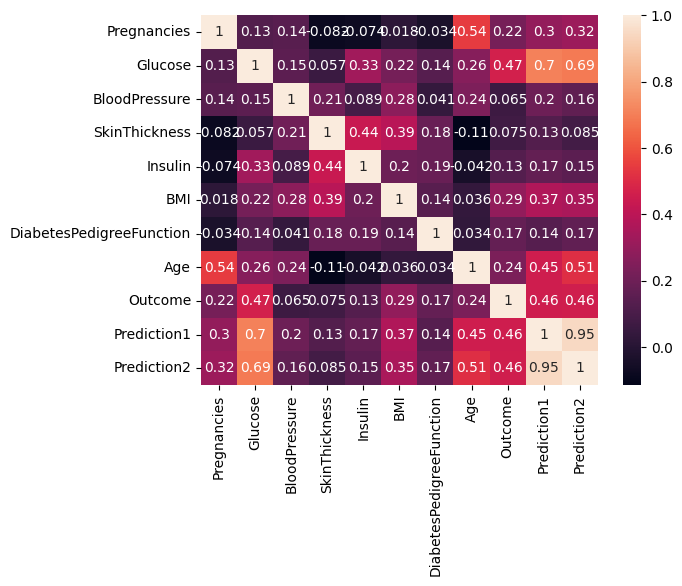

In [22]:
sns.heatmap(diabetes.corr(), annot = True)
plt.show()

In [23]:
# As both the training and testing data are giving the best result for the models.